# Syed Farhan Alam Zaidi
# 2018210031
# Assignment 12
## Non-Linear Least Square Fitting with regularization

Github Link: https://github.com/farhan-93/assignment12.git

Import required libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
plt.rcParams.update({'figure.max_open_warning': 0})

Below function will generate the data.

In [10]:
def make_data():

   
    num = 1001
    std = 5 

    def fun (x):
        #f = np.sin (x) * (1 / (1 + np.exp (-x))) 
        f = np.abs (x) * np.sin (x)
        return f

    n = np.random.rand (num)
    nn = n - np.mean (n)
    x = np.linspace (-10,10, num)
    y1 = fun (x)
    y2 = y1 + nn * std
    
    plt.figure(0)
    plt.title("Clean Data")
    plt.plot (x, y1, 'b.')
    plt.plot(x,y1,'b')
    
    plt.figure(1)
    plt.title("Noisy Data")
    plt.plot (x, y2, 'k.')
    plt.plot(x,y2,'k')
    
    plt.figure(3)
    plt.title("Clean and Noisy Data")
    plt.plot (x, y2, 'k.' )
    plt.plot(x,y2,'k',label="Noisy")
    plt.plot (x, y1, 'b.')
    plt.plot(x,y1, 'b',label="Clean")
    plt.legend()
    plt.show ()

    return x, y2, y1


Below function will calculate the best nonlinear curve line for abouve random generaetd data.
  And calculate the approximation function
  $$ \hat{f(x)} = \theta_{0} + \theta_{2}x + \ldots + \theta_{p-1}x^{p-1} $$
  
  Least square fitting formula with regularization:
  $$ E(θ; λ) = ||Aθ − y||^2_2 + λ||θ||^2_2  $$

In [7]:
############## d=p-1
def least_squares(x, y,d,lamb):
    
    
    n = len(x)
    ############## Create the matrix A (polynomial matrix)
    a=np.c_[np.ones(n)]
    for z in range(1,d):
        a = np.c_[a,x**z]
    ##### convert Feature matrix into sparse matrix
    a=sp.sparse.csr_matrix(a)    
    ############## MAKE IDENTITY MATRIX
    I=sp.sparse.identity(d)
    ######## Convert identity sparse matrix into compressed sparse row matrix
    I=sp.sparse.csr_matrix(I)
    ########### create zero matrix 
    zero=sp.sparse.csc_matrix((1,d))
    ###### Create block matrix A for regularized least squeare fitting
    A=sp.sparse.bmat([[a.T,np.sqrt(lamb)*I]]).toarray()
    
    ############# Implement pseudo inverse method for least square problem
    Ai=A.dot(A.T)
    Ain=sp.sparse.csc_matrix(Ai)
    Ainn=sp.sparse.linalg.inv(Ain)
    B=sp.sparse.bmat([[y,zero]]).toarray()
    
    right=A.dot(B.T)
    
    u=Ainn.dot(right)
    
    ########### u is the model parameter.
    u=np.asarray(u)
    ################ calculating curve or line by calculating approximation function discussed above
    curve=0.0
        ######
    for k in range(0,d):
        curve= curve +(u[k]*x**k)
        
        
    return u,curve

d is the degree of polynomial. We calculate the 15 degree polynomials below. It can be chage and can be any integer.

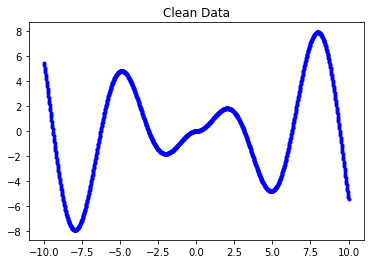

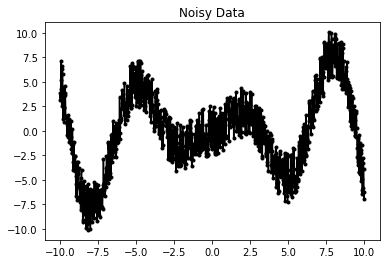

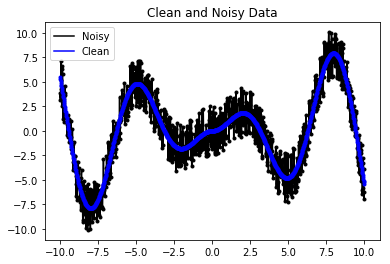

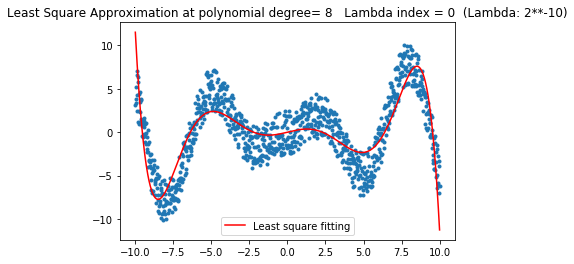

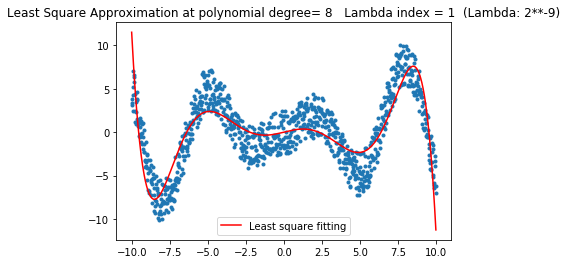

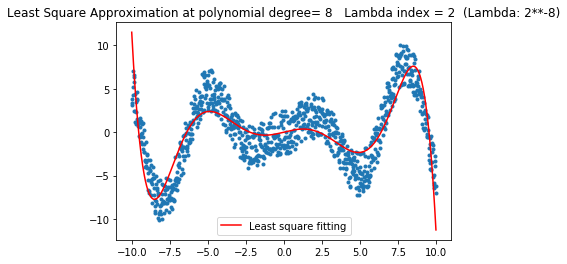

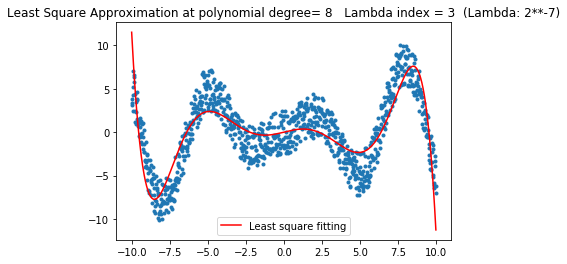

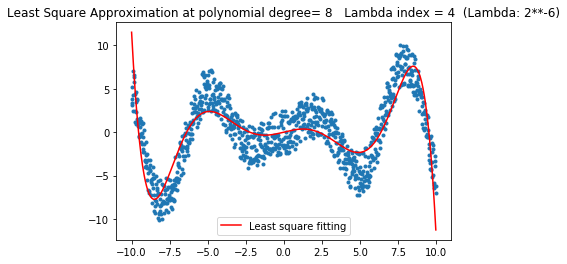

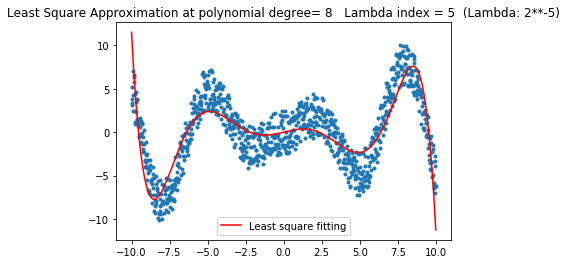

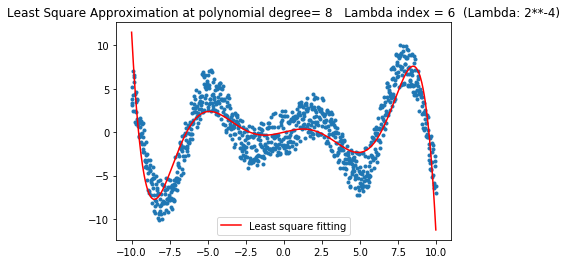

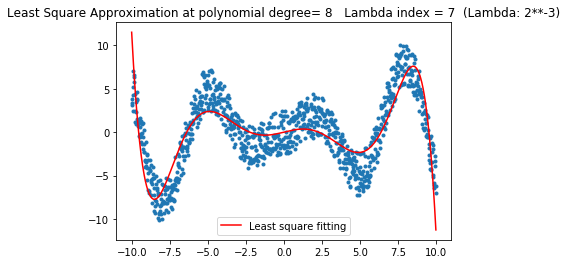

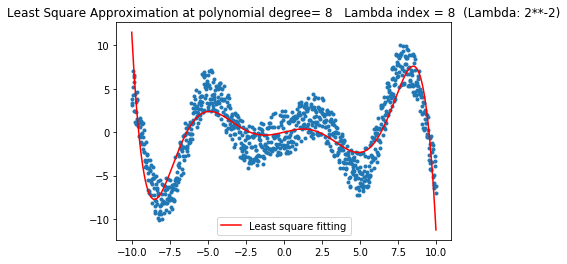

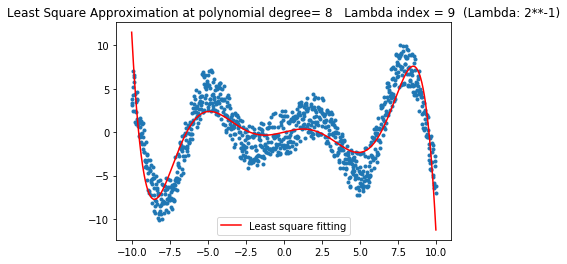

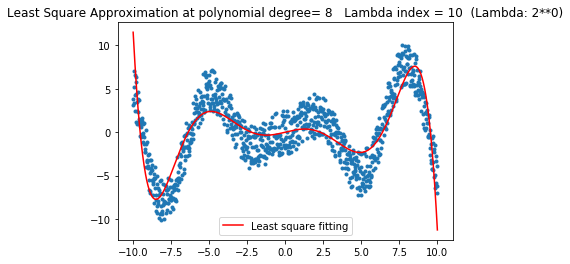

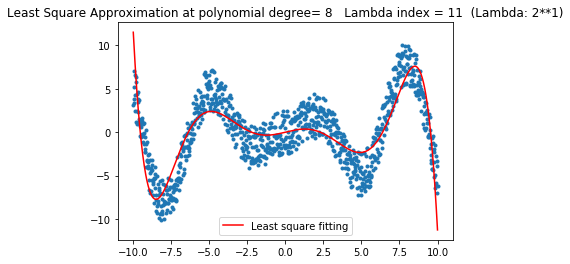

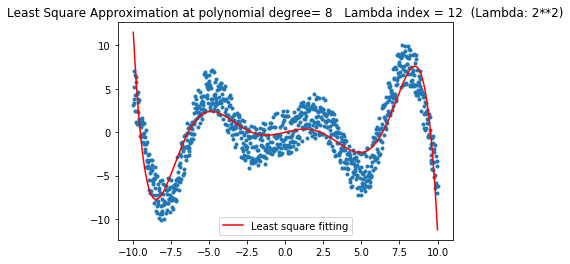

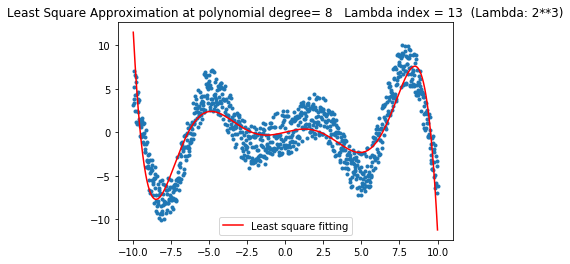

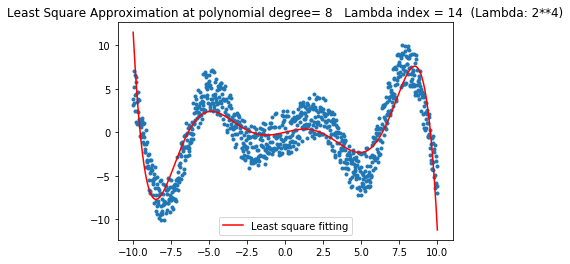

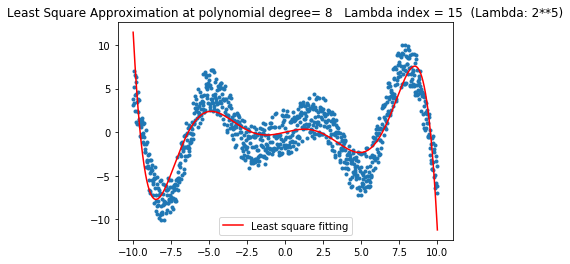

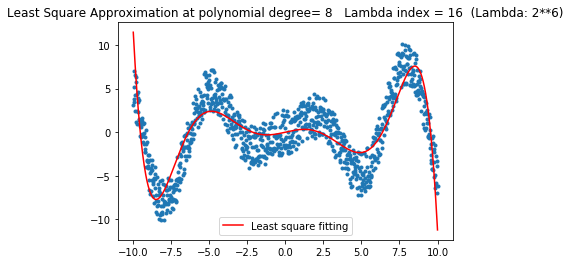

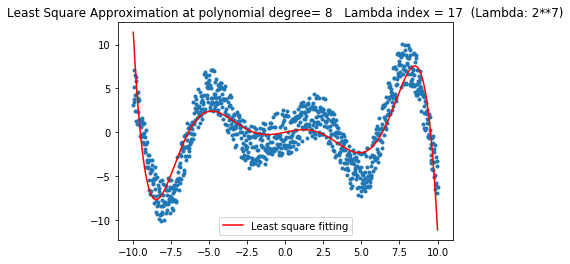

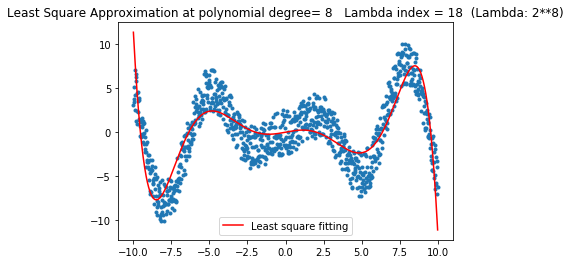

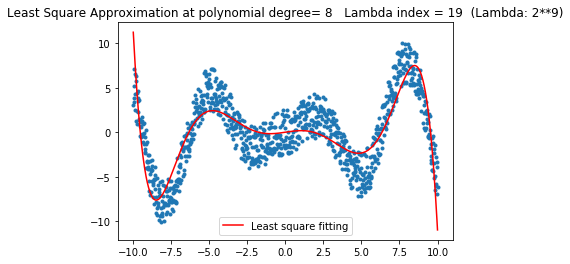

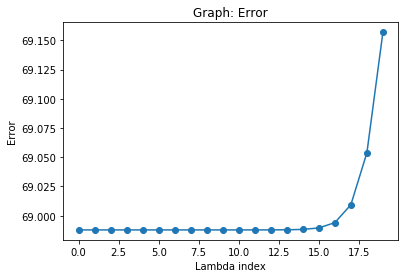

______________________________________________________________________________________________________


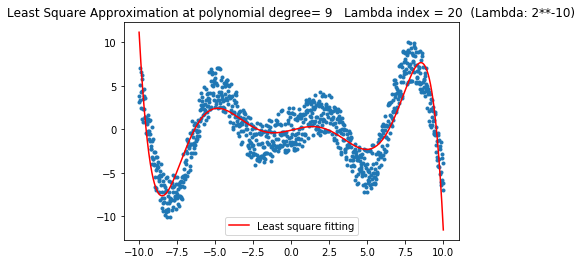

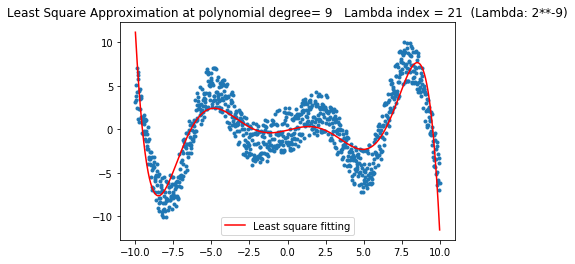

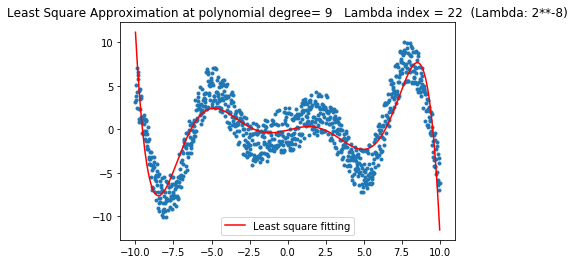

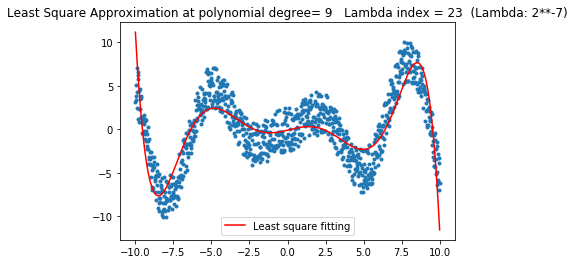

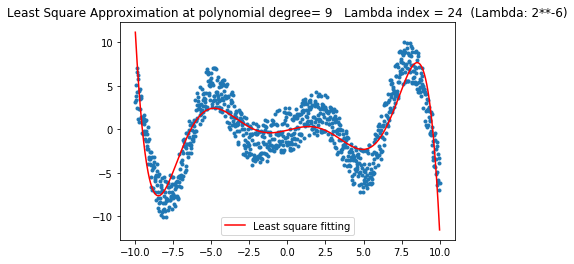

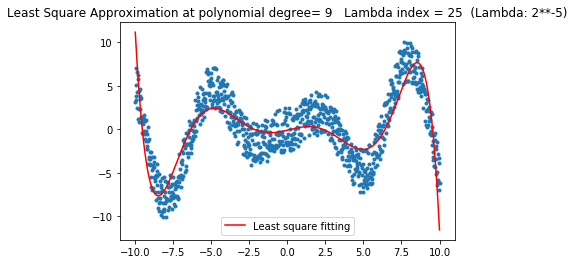

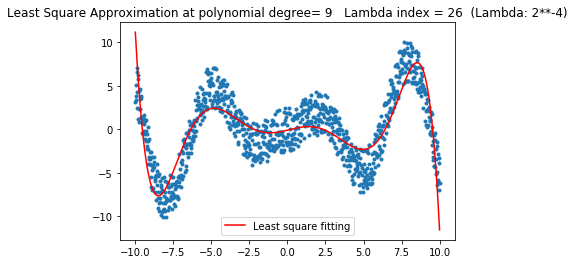

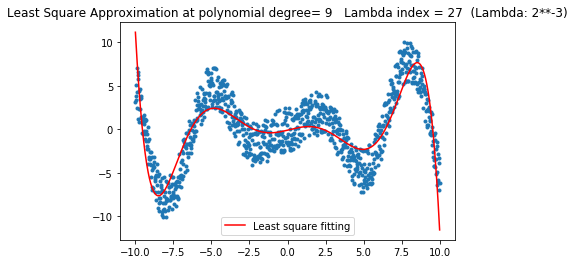

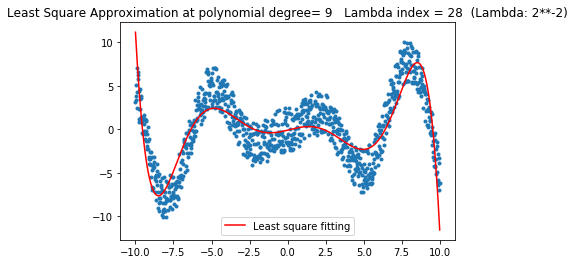

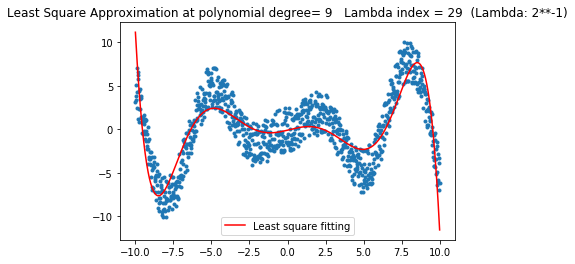

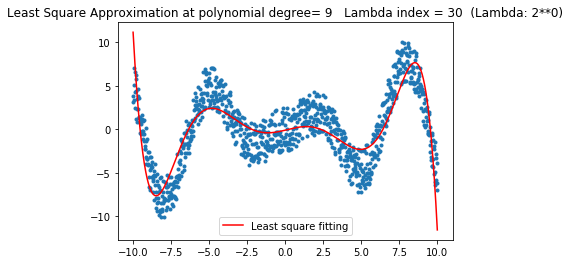

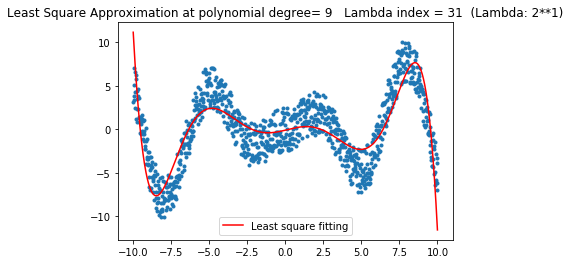

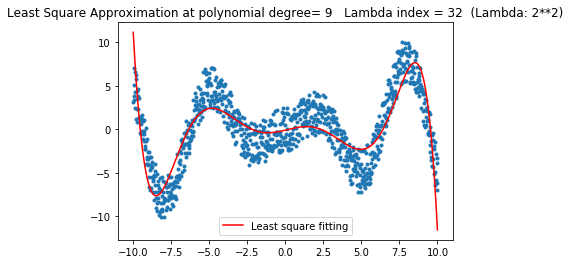

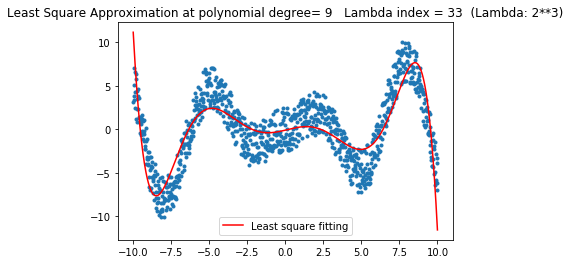

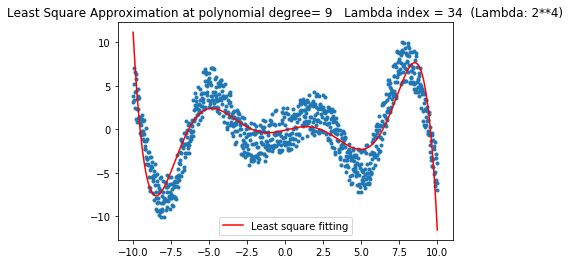

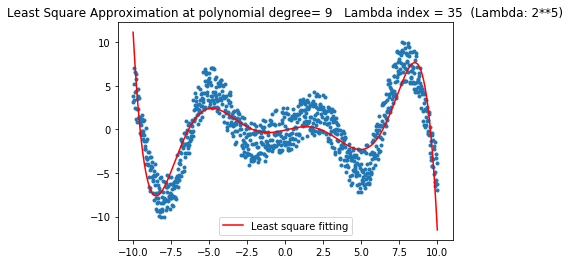

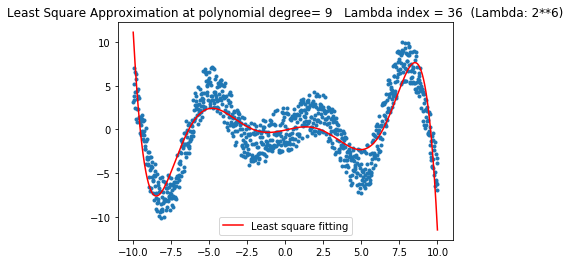

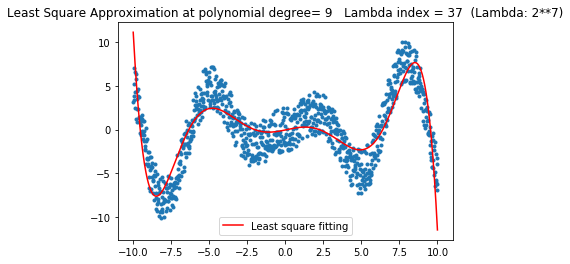

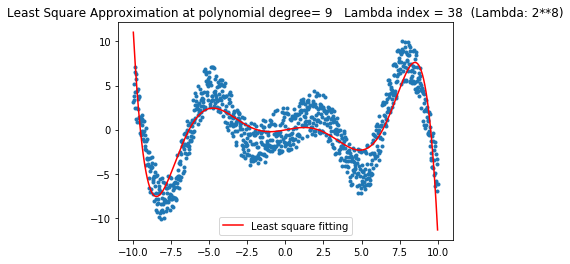

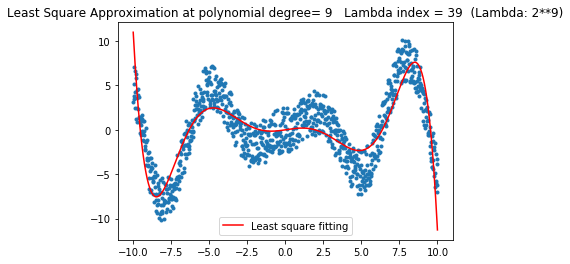

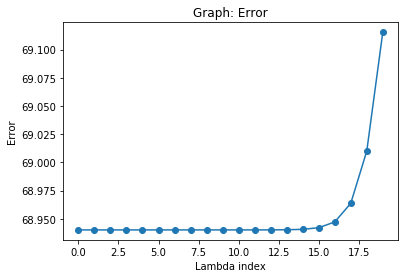

______________________________________________________________________________________________________


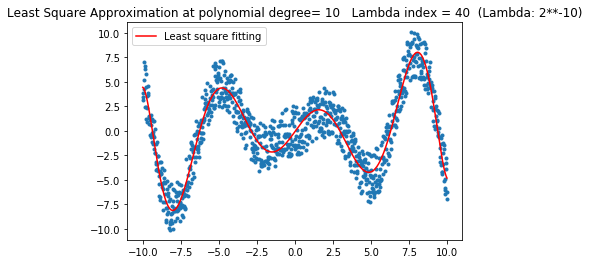

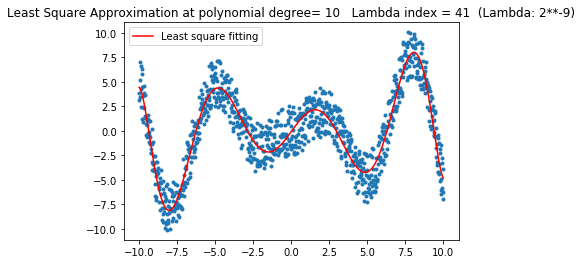

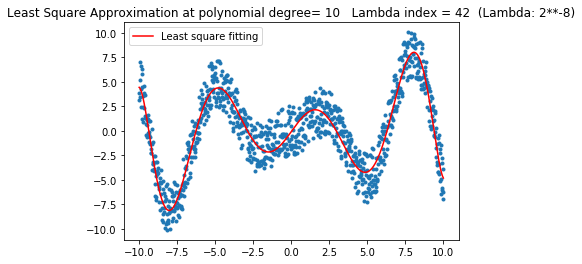

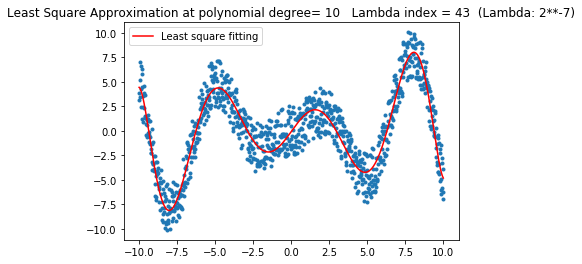

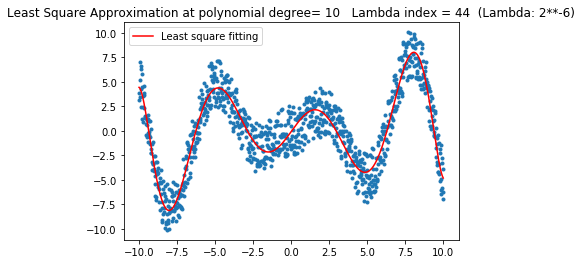

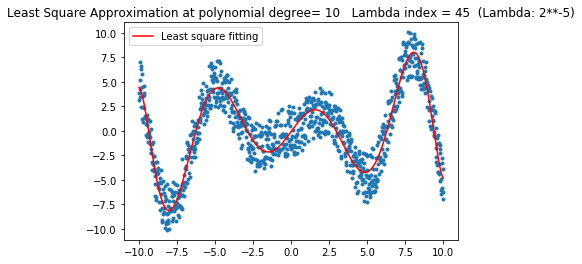

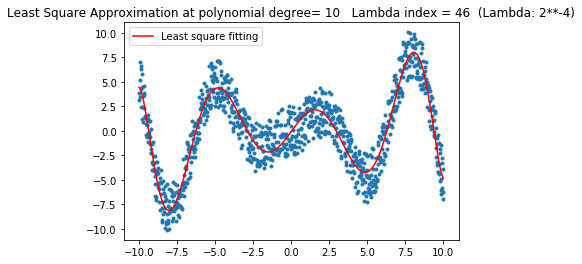

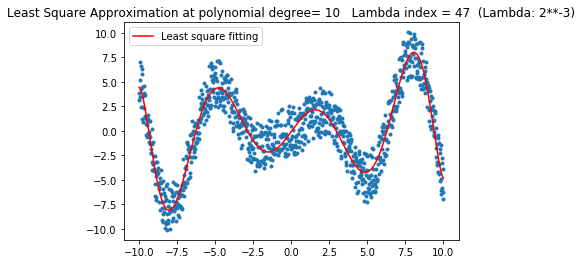

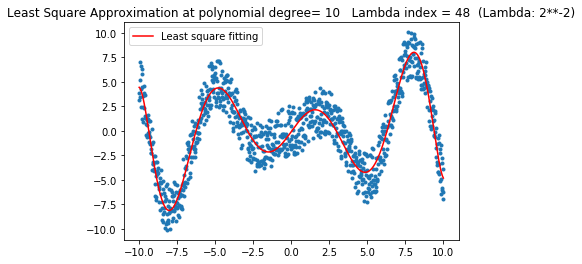

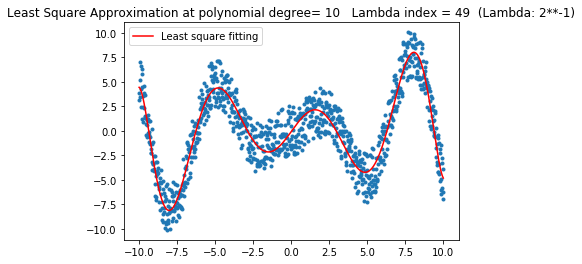

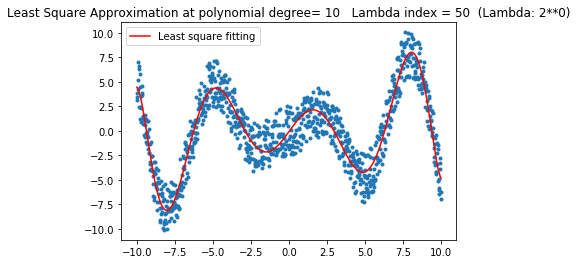

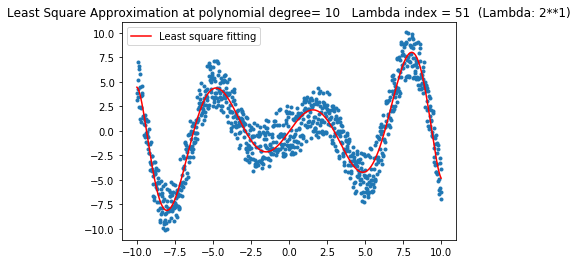

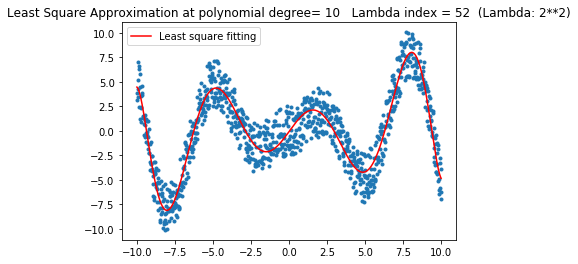

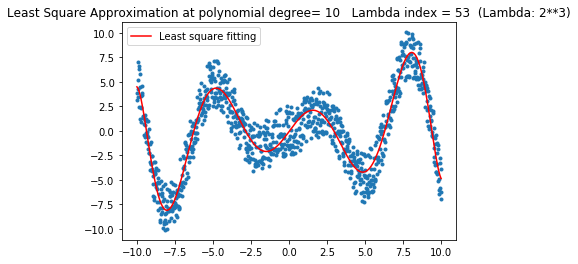

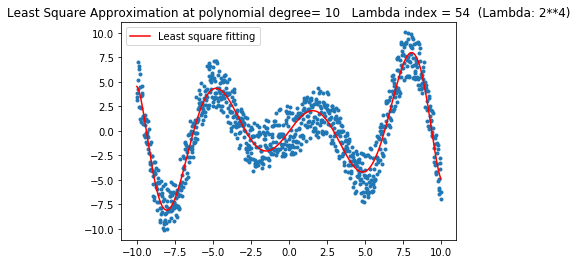

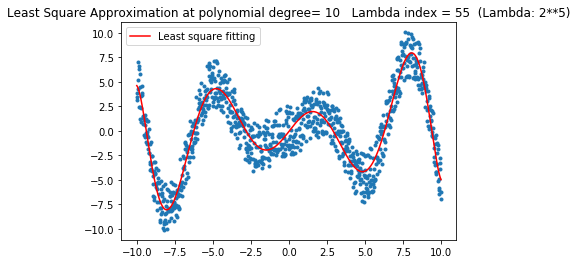

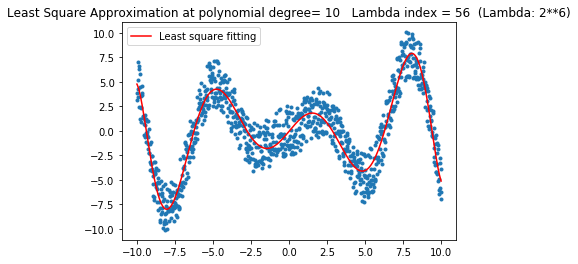

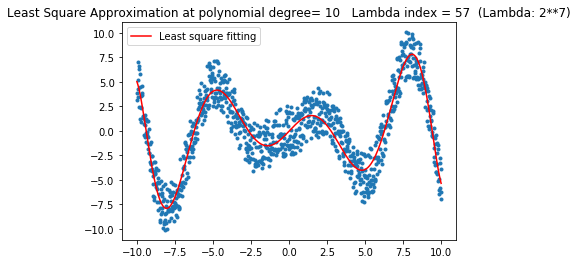

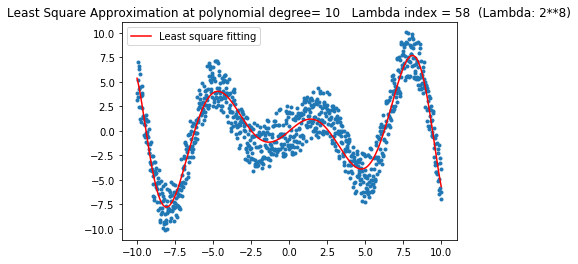

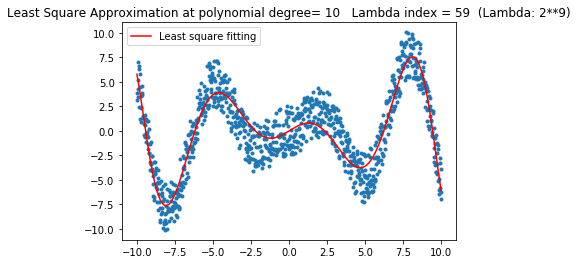

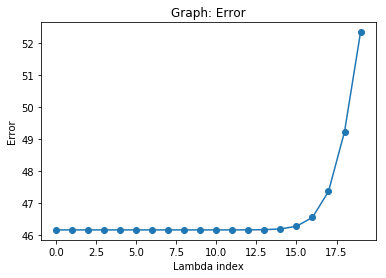

______________________________________________________________________________________________________


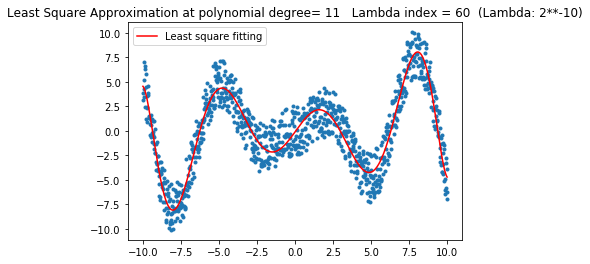

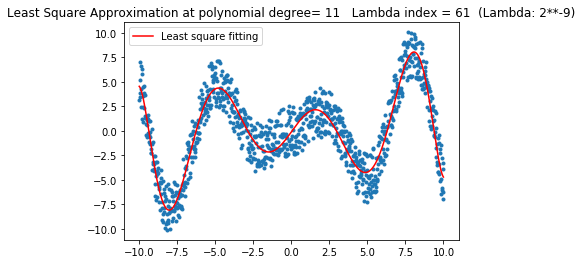

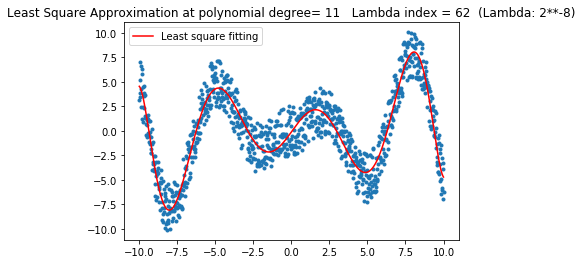

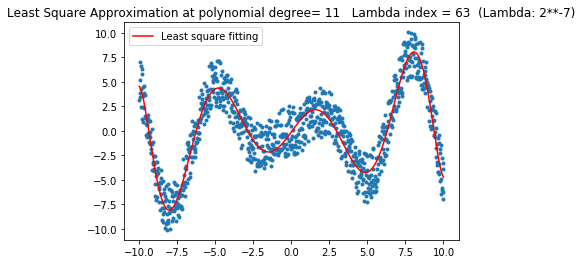

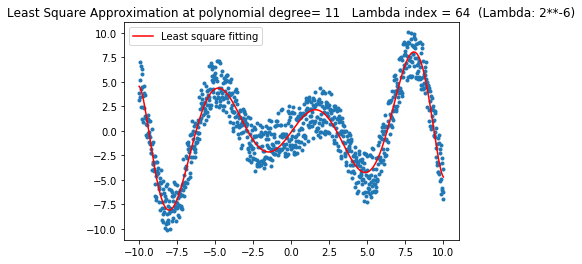

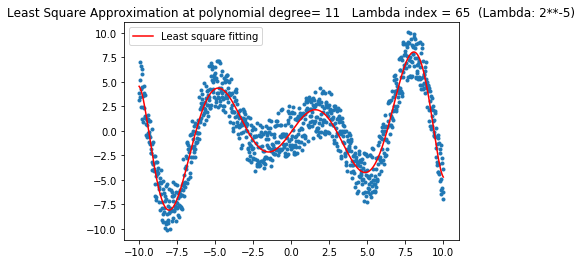

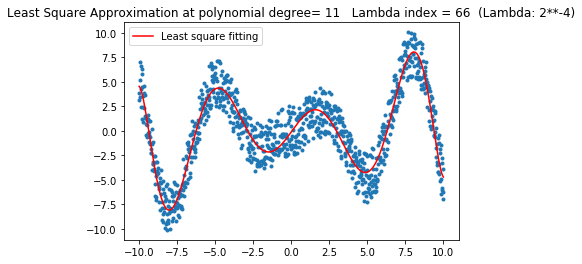

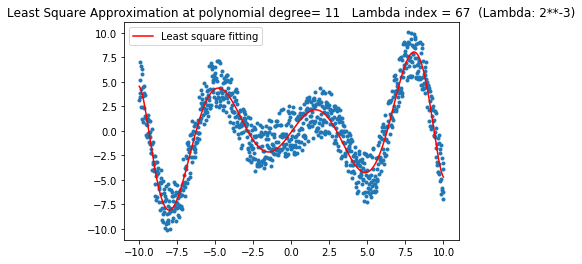

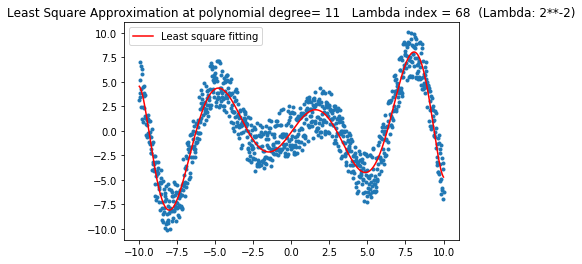

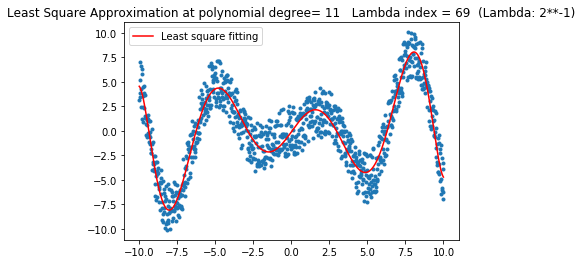

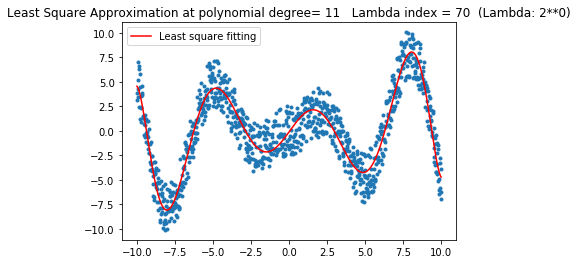

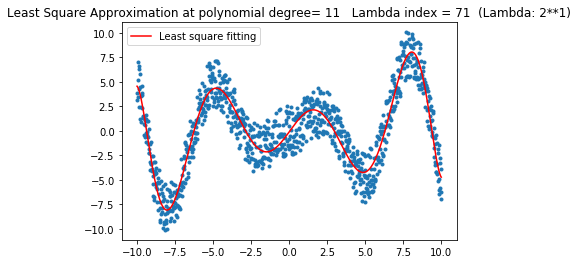

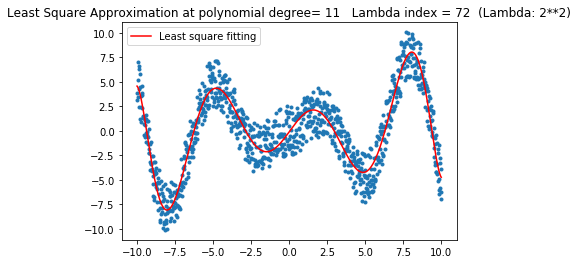

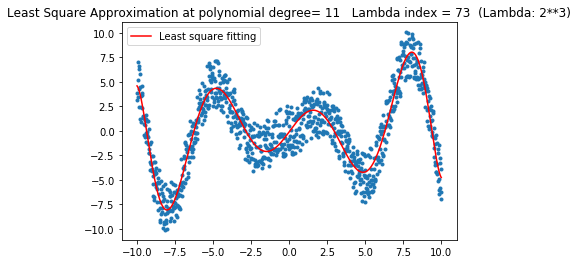

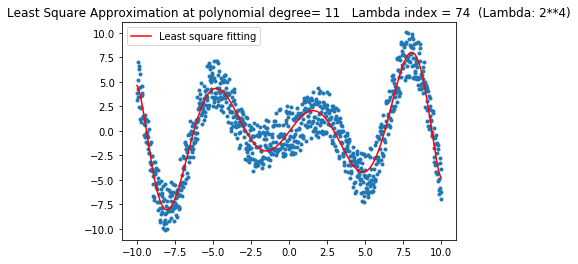

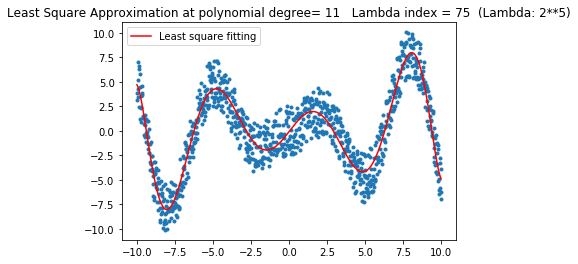

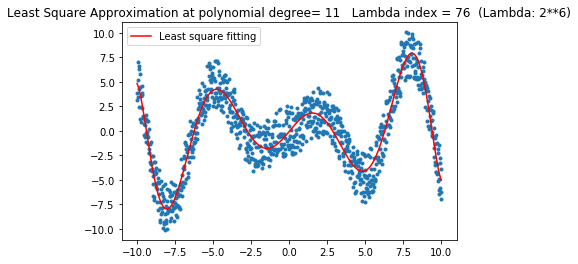

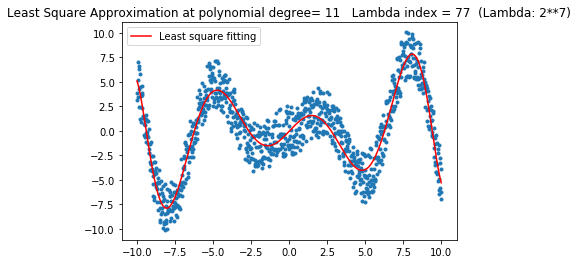

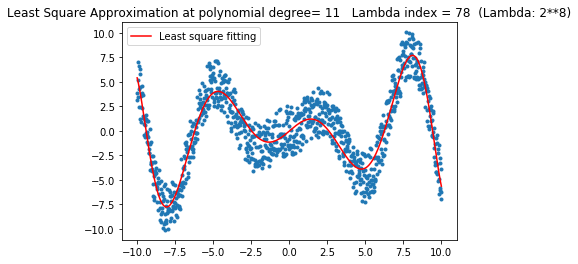

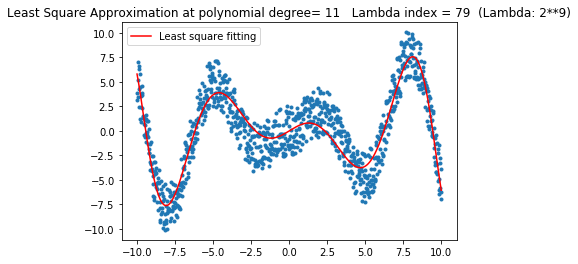

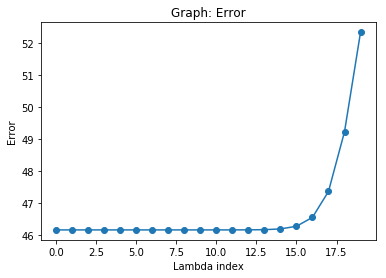

______________________________________________________________________________________________________


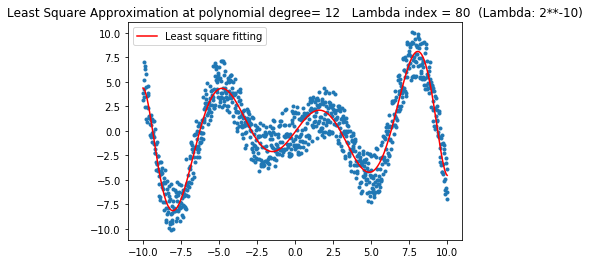

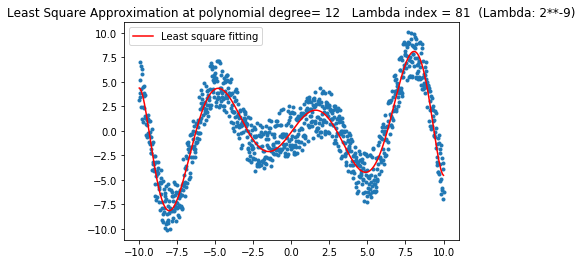

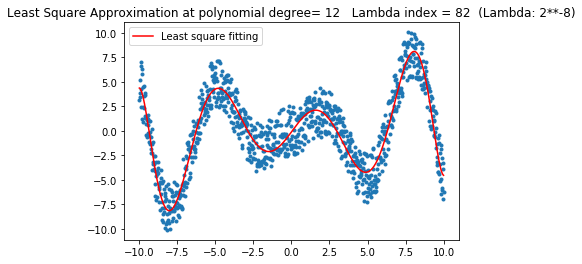

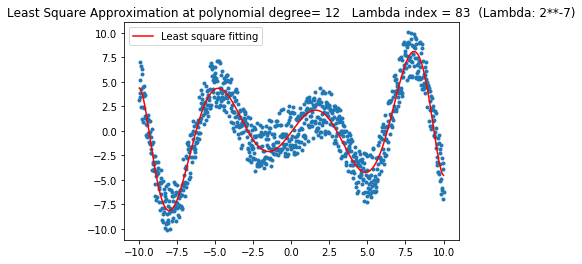

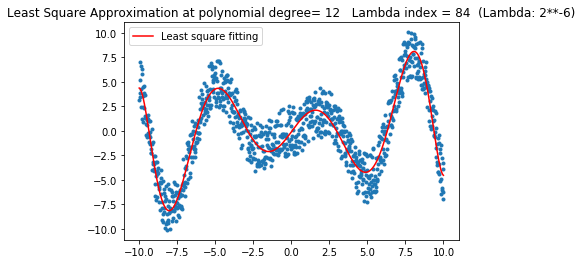

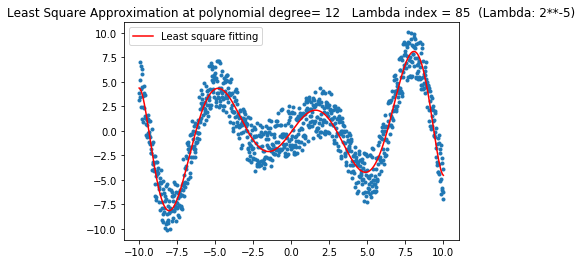

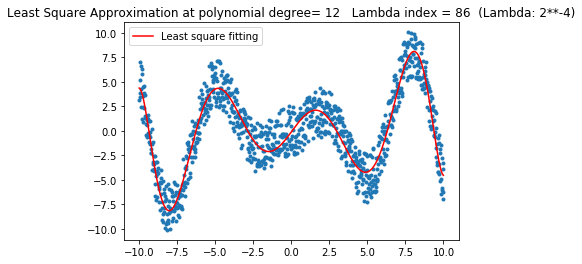

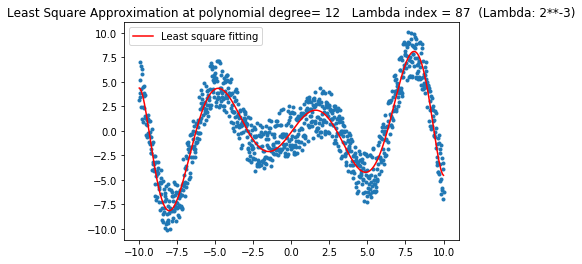

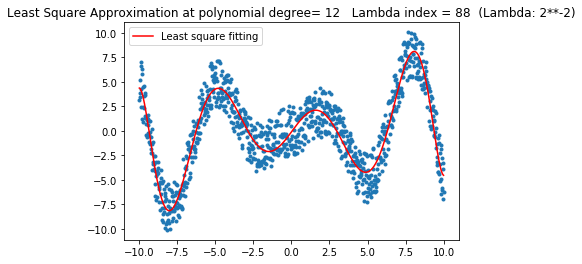

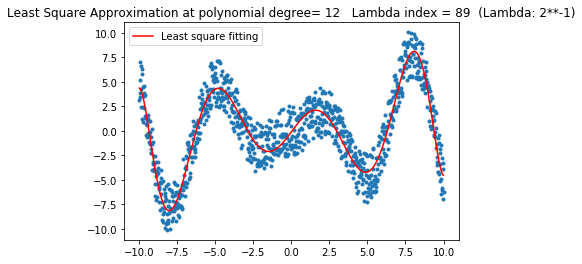

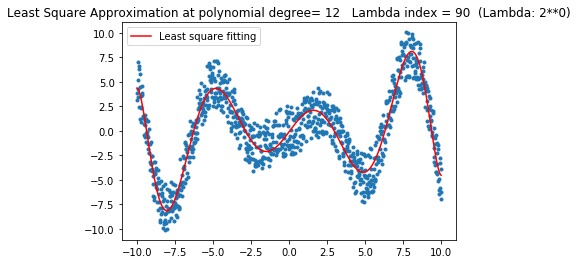

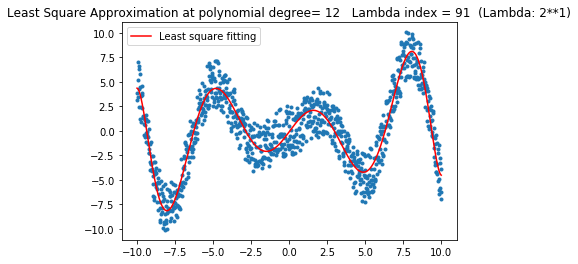

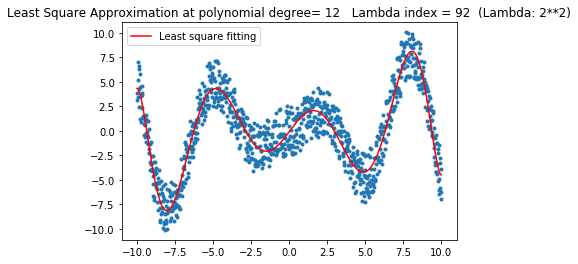

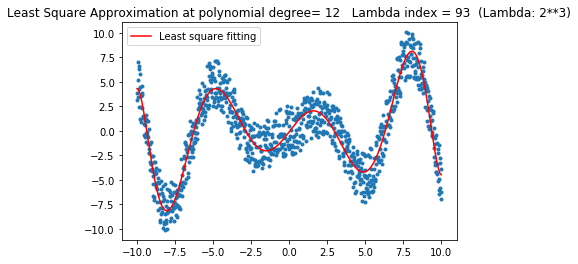

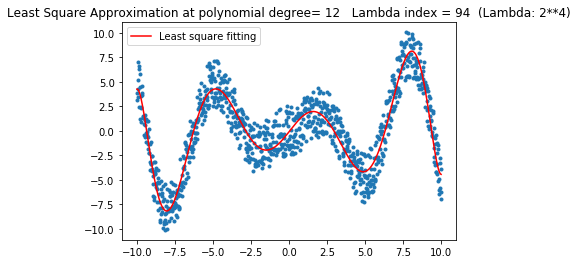

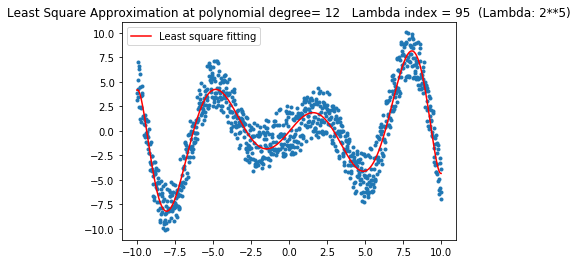

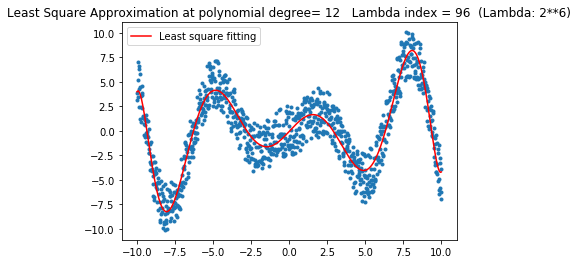

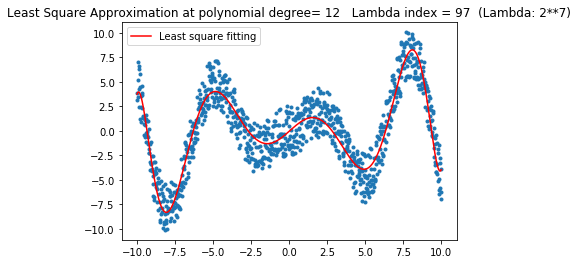

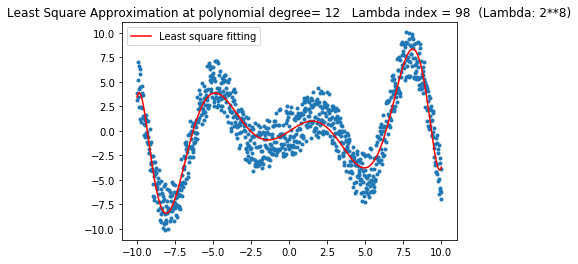

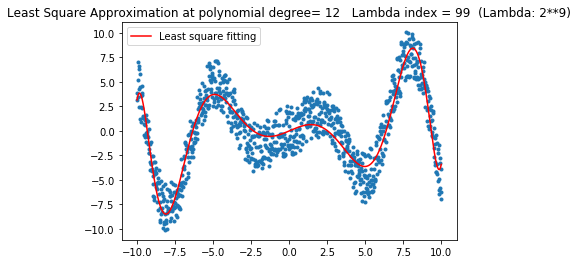

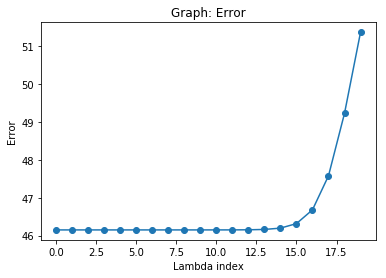

______________________________________________________________________________________________________


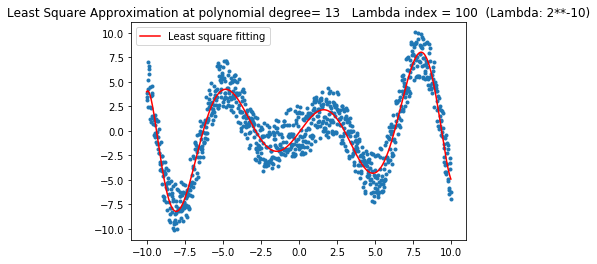

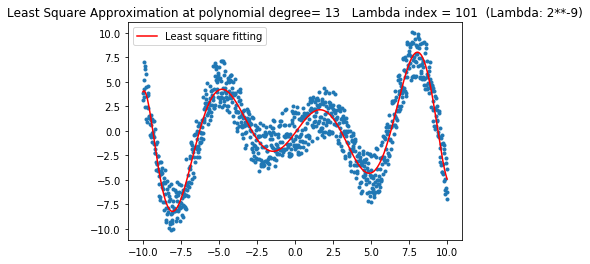

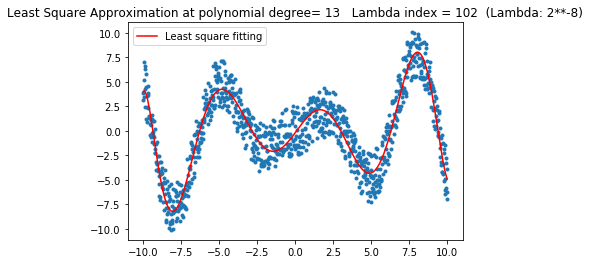

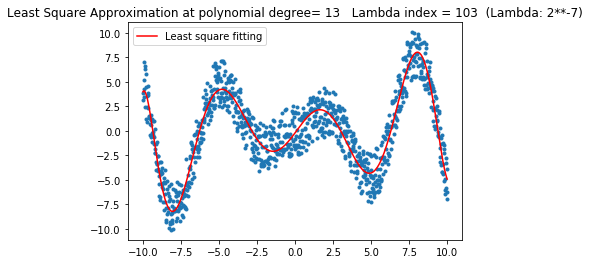

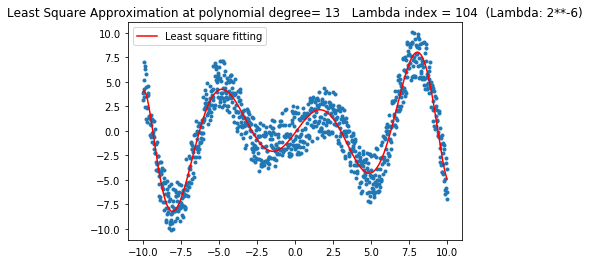

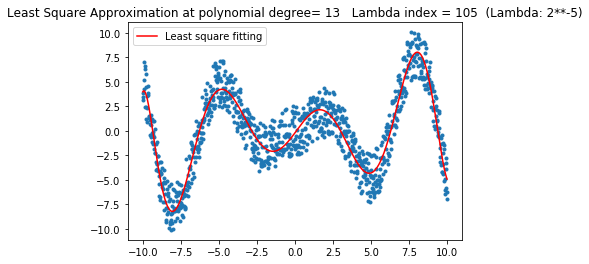

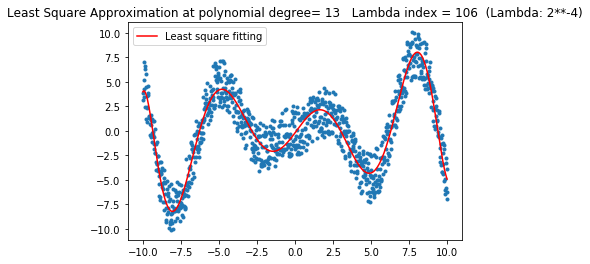

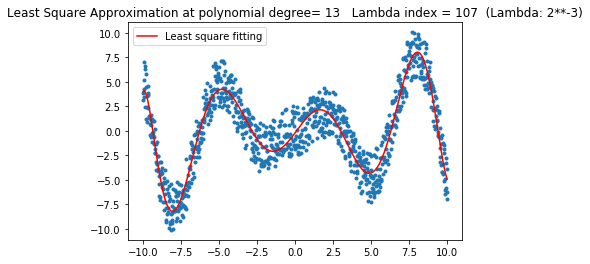

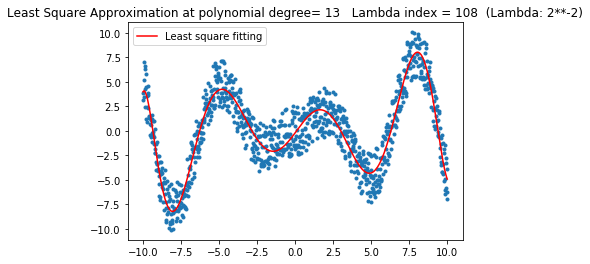

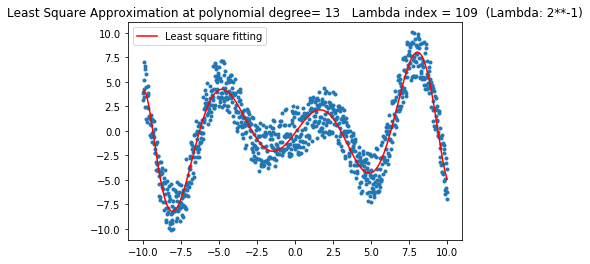

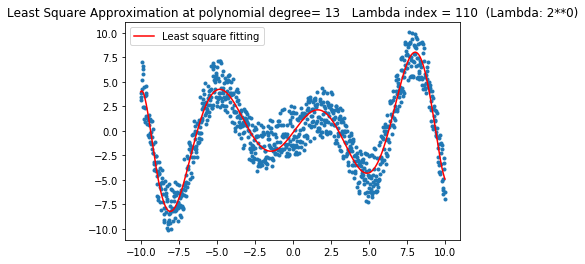

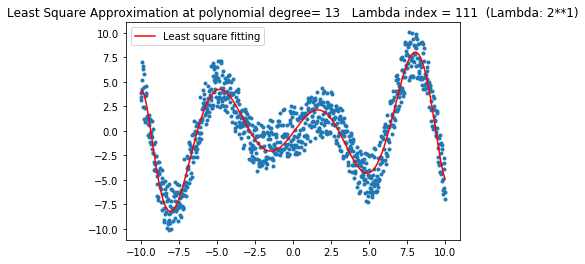

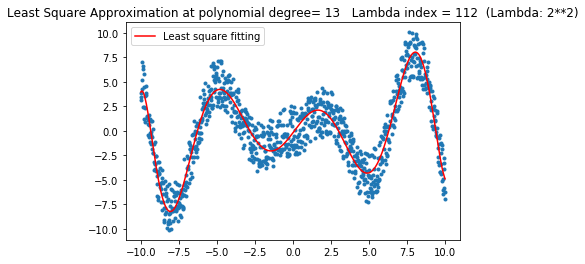

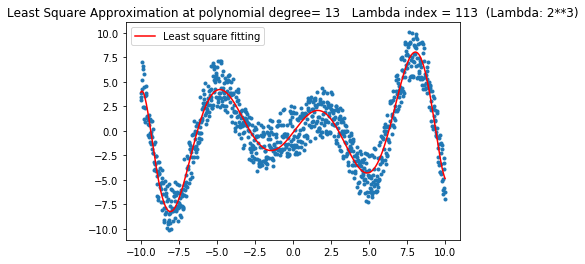

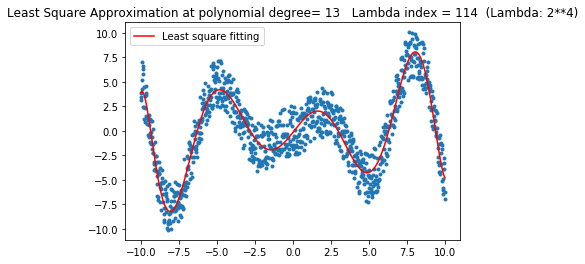

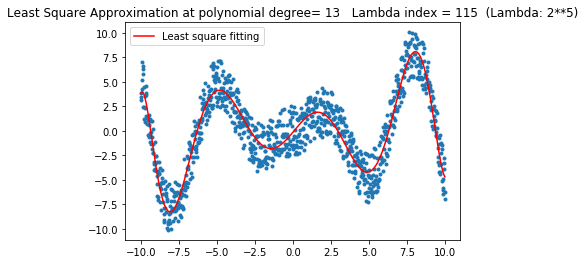

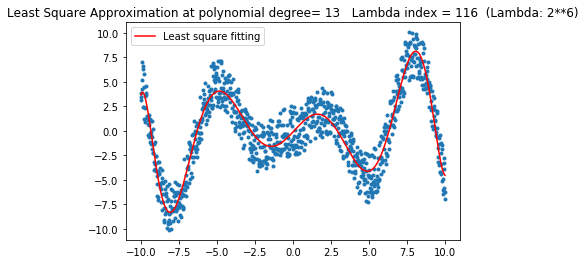

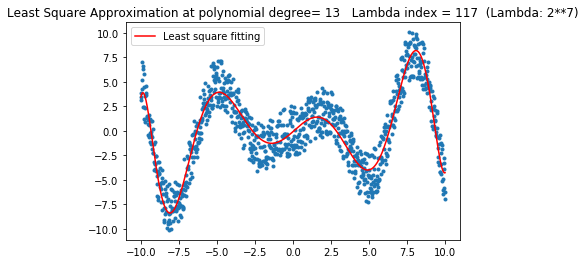

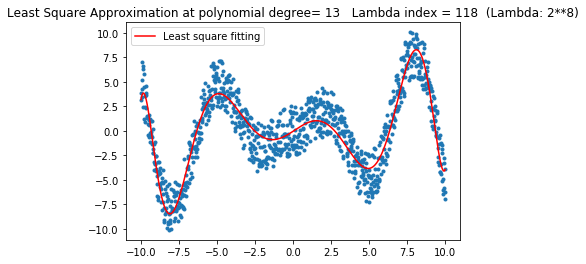

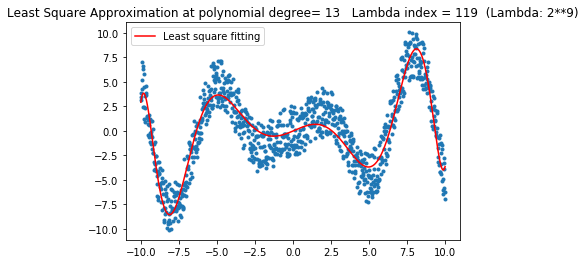

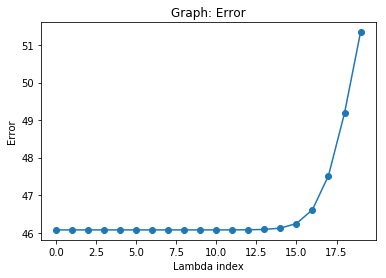

______________________________________________________________________________________________________


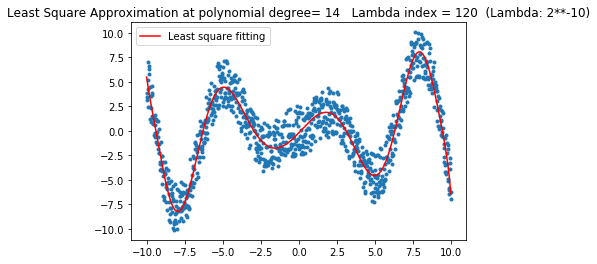

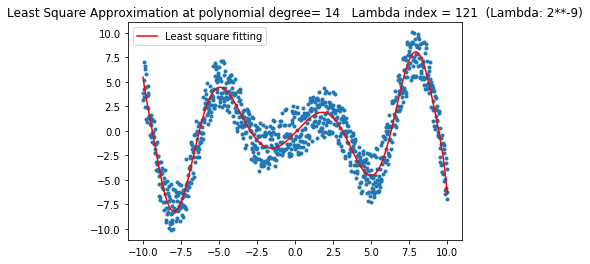

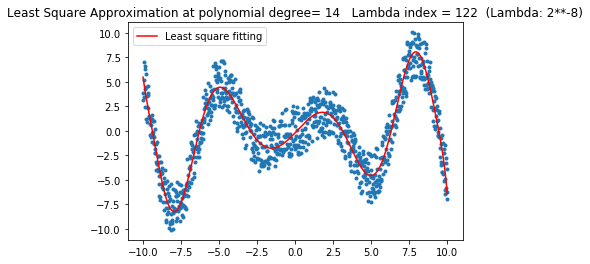

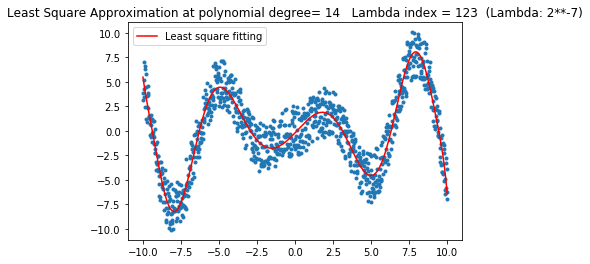

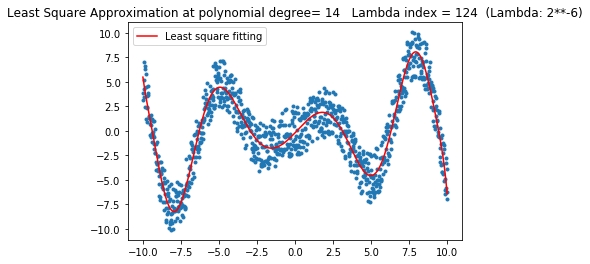

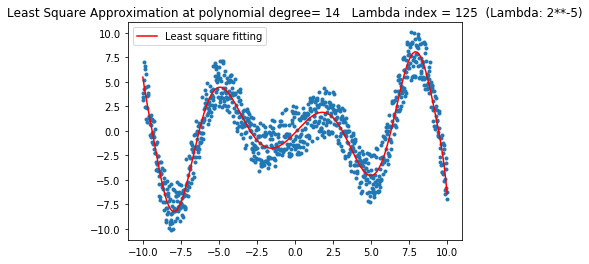

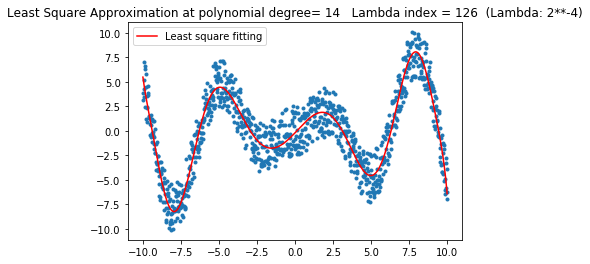

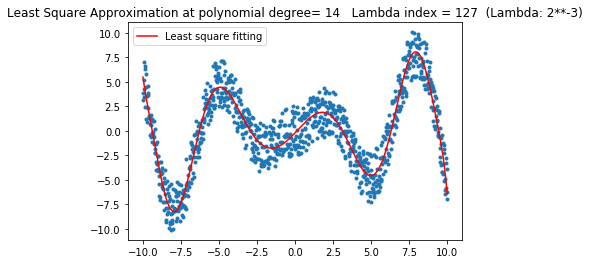

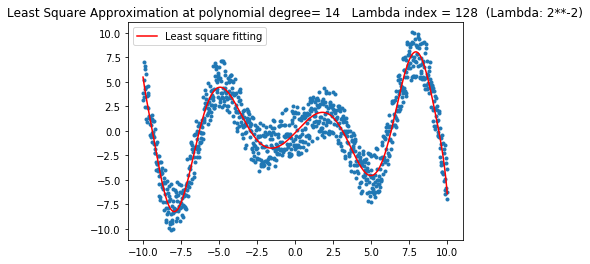

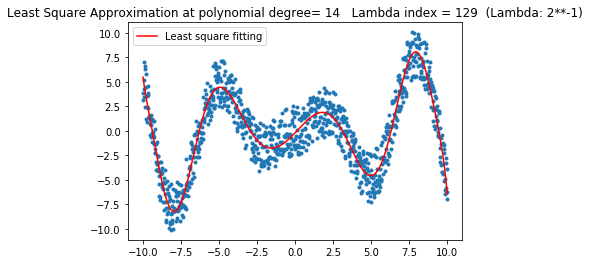

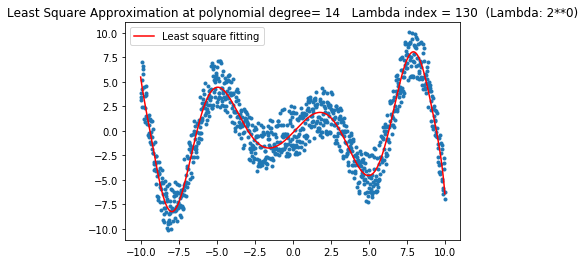

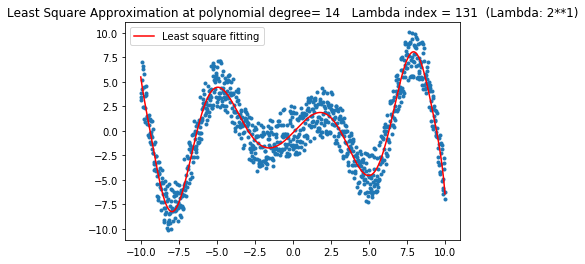

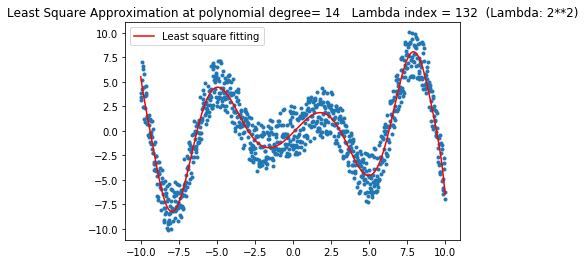

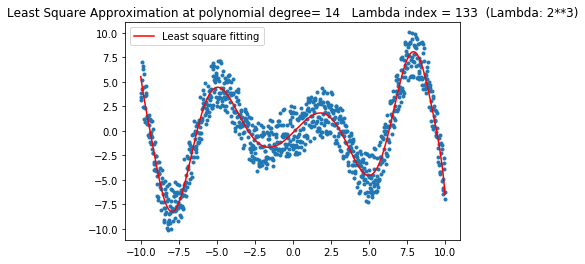

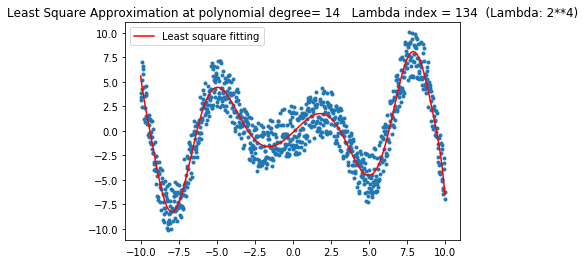

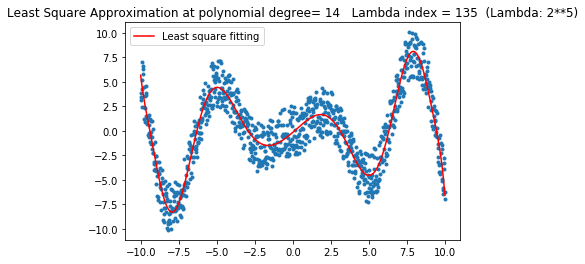

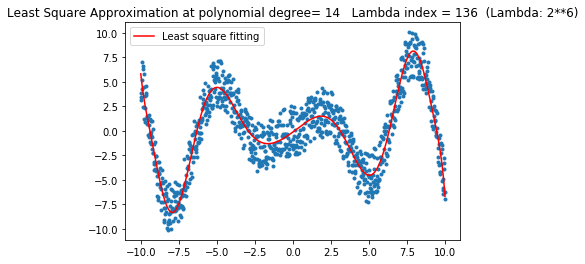

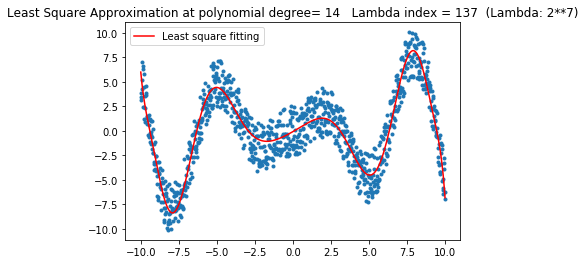

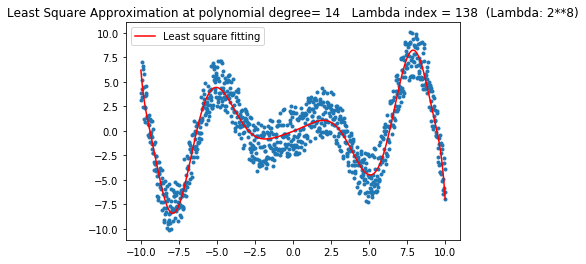

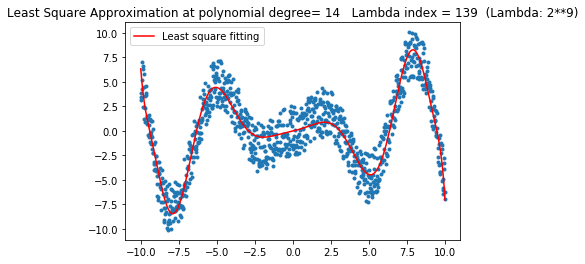

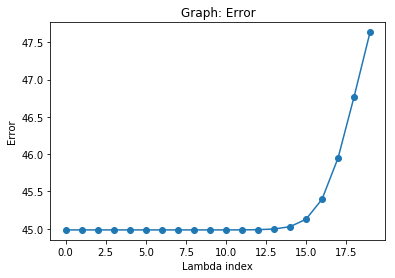

______________________________________________________________________________________________________


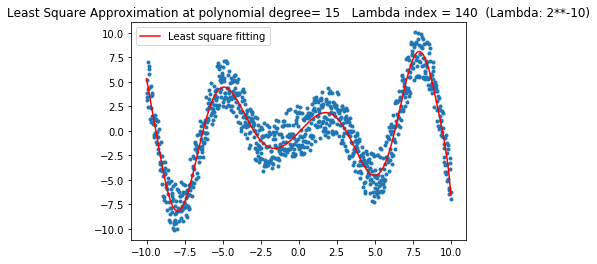

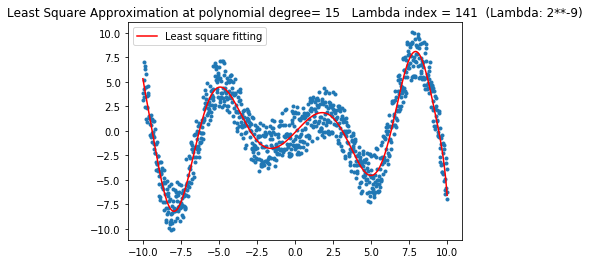

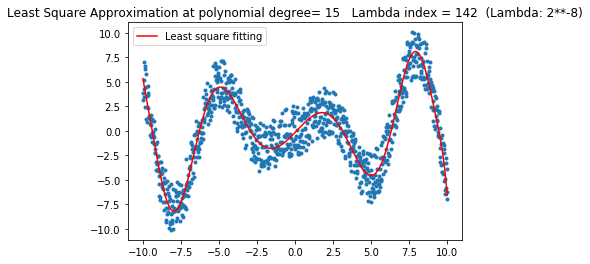

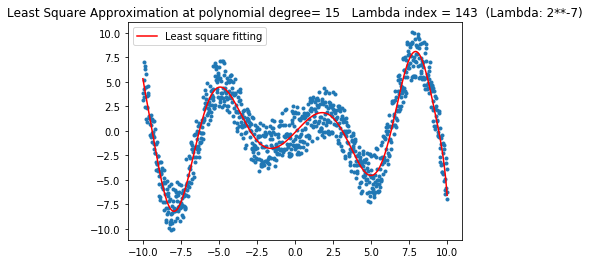

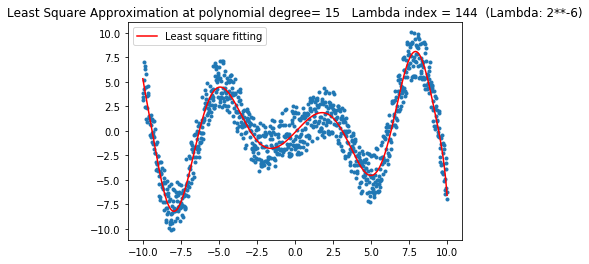

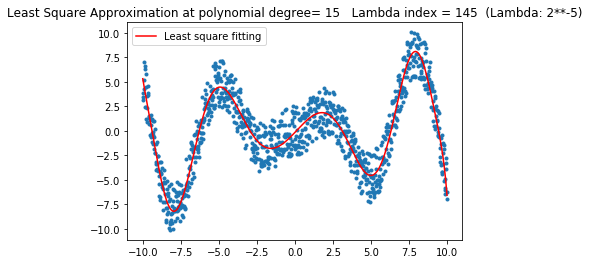

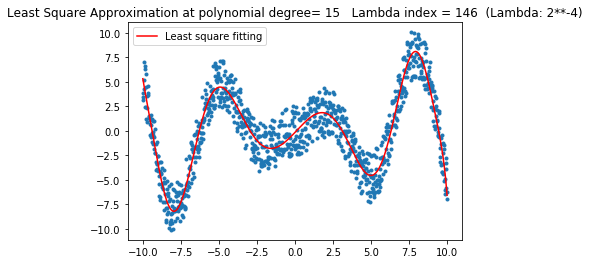

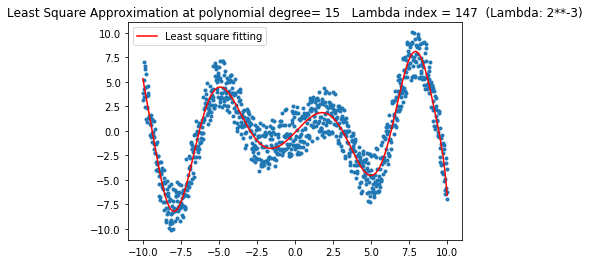

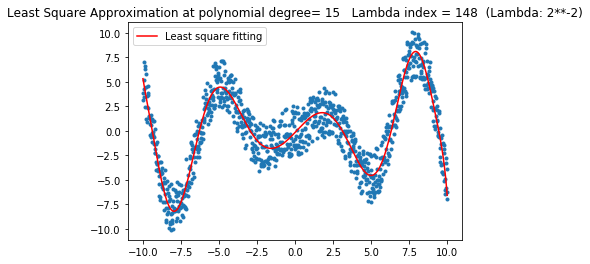

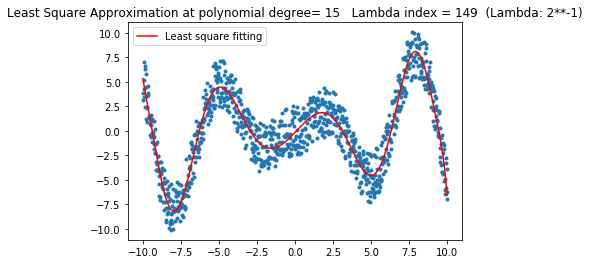

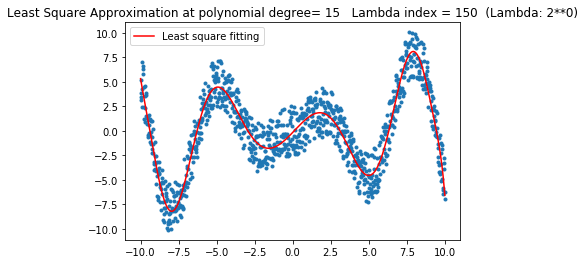

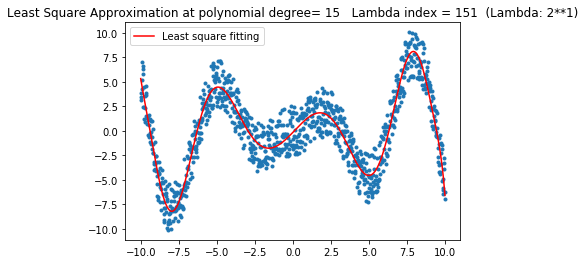

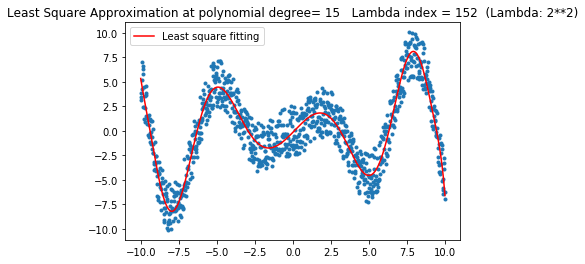

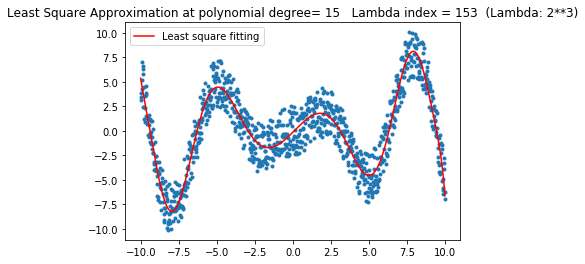

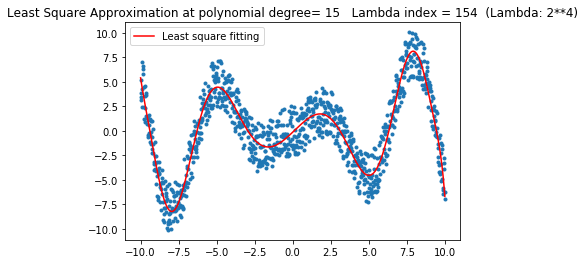

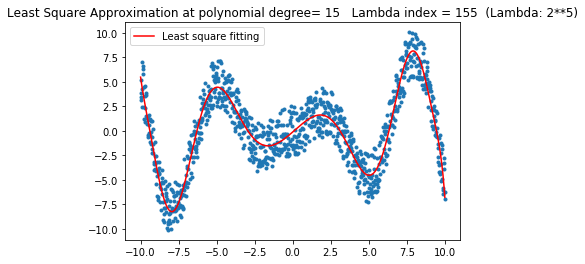

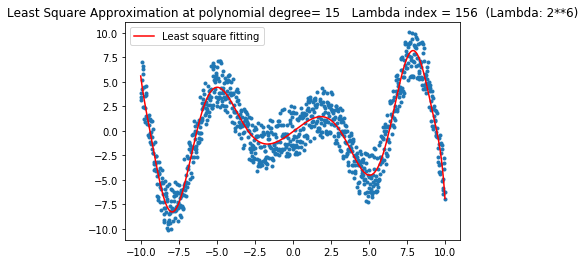

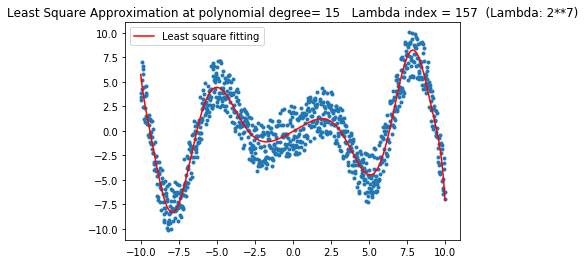

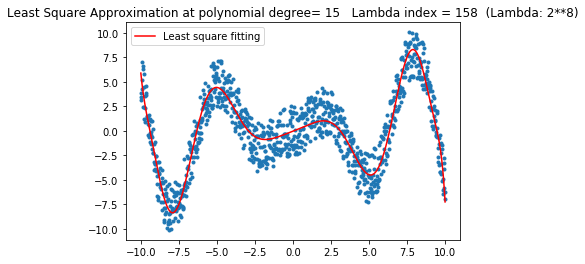

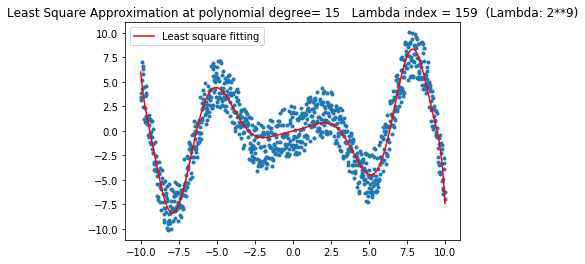

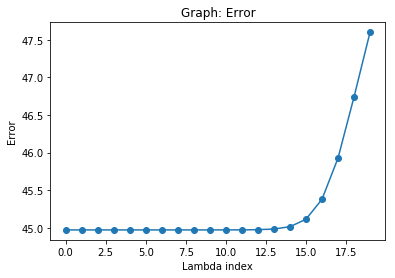

______________________________________________________________________________________________________


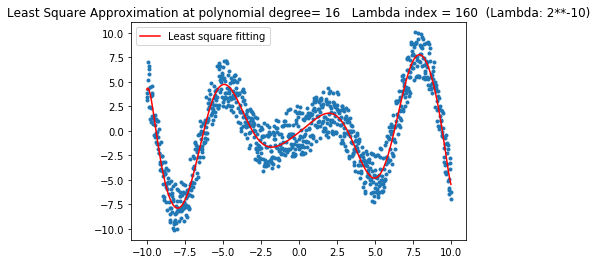

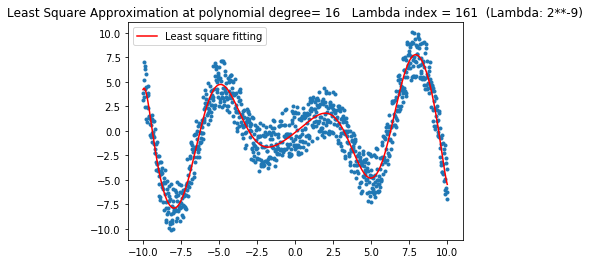

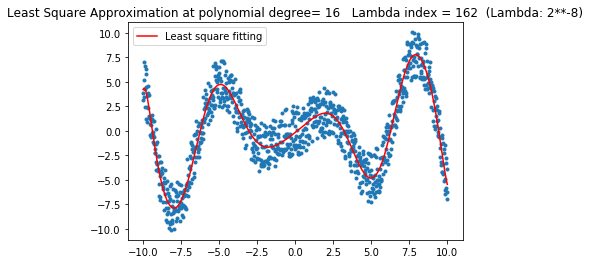

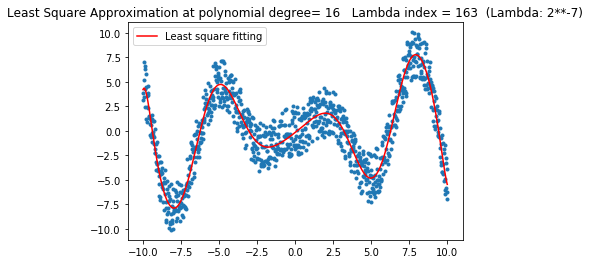

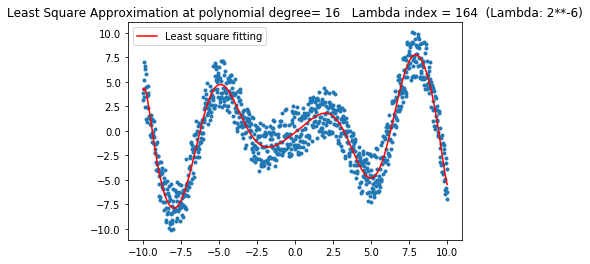

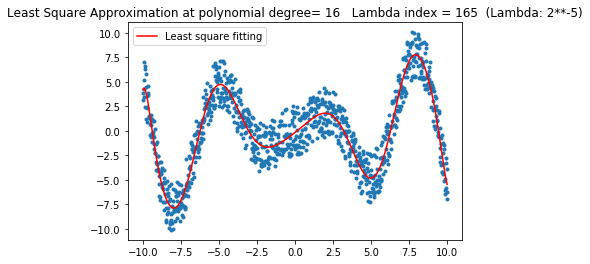

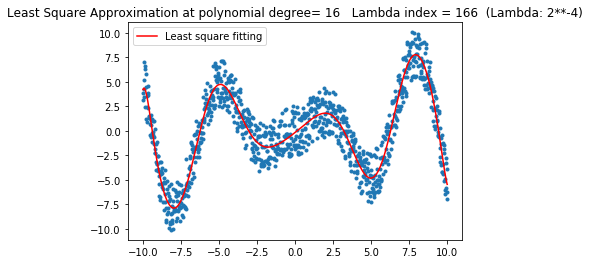

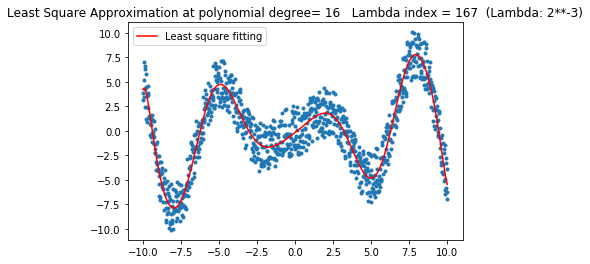

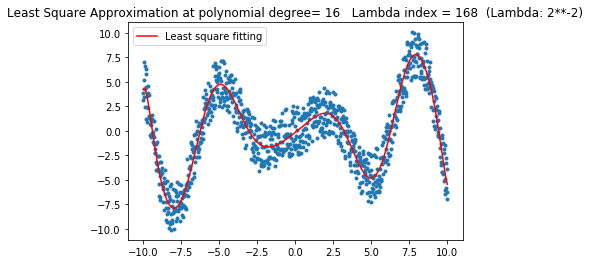

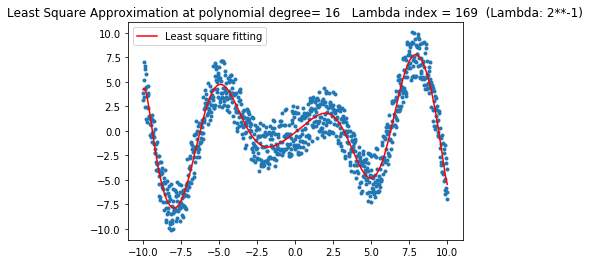

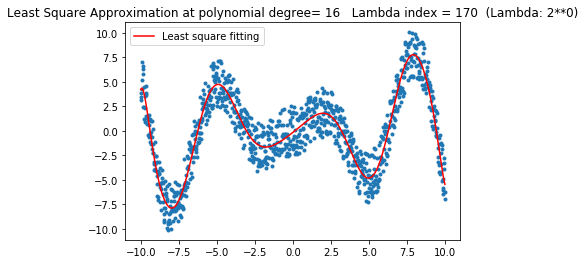

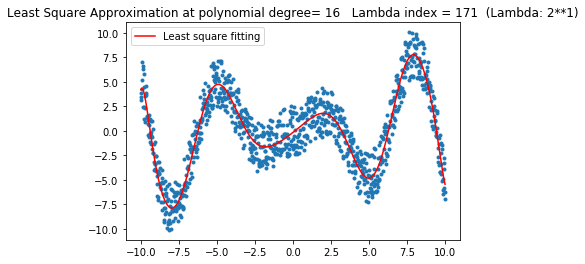

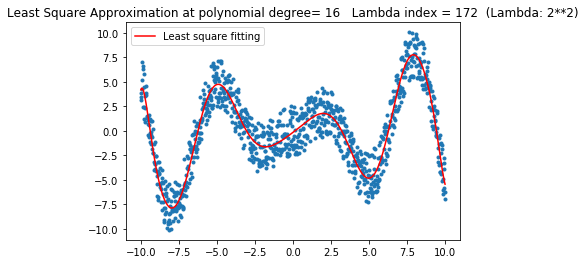

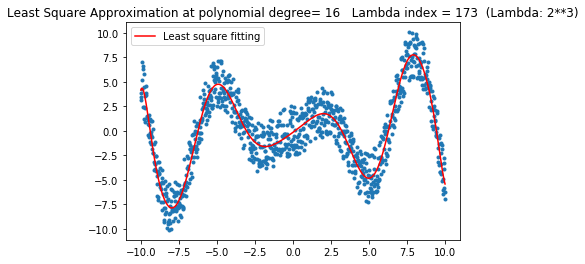

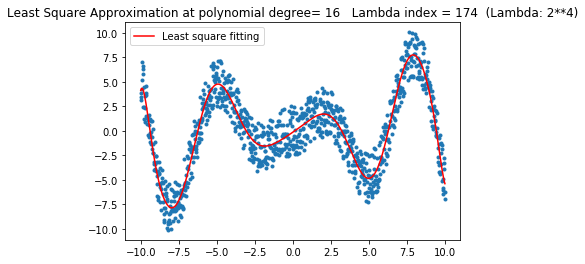

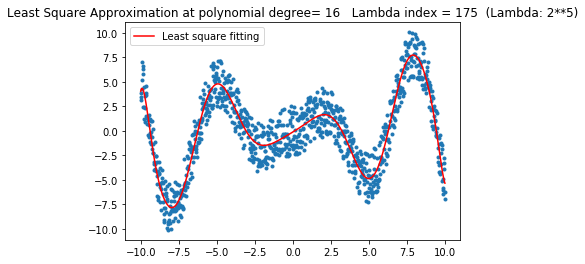

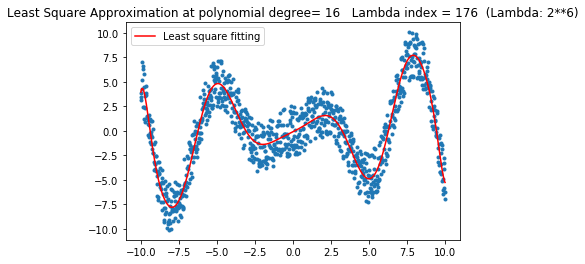

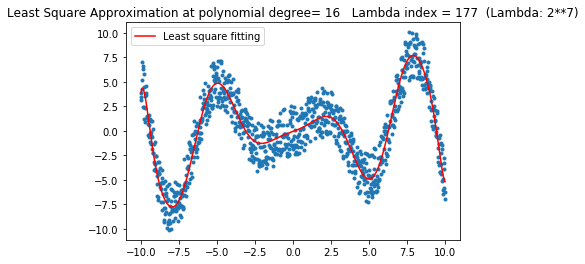

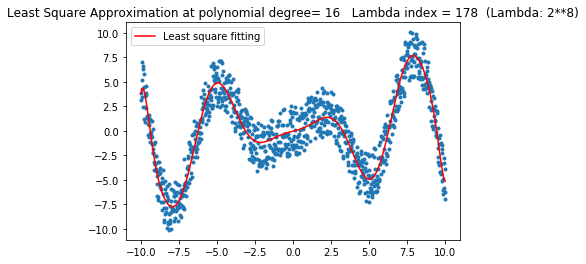

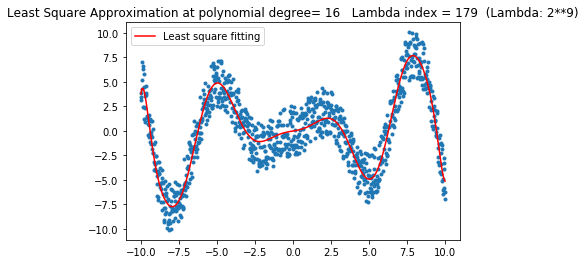

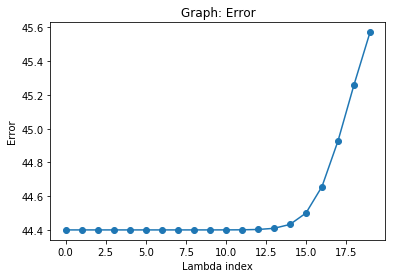

______________________________________________________________________________________________________


In [11]:
##### generate data
x, y, y_clean = make_data()
# d is the degree of plynomial
count=1
count1=0
############ for loop that control the polynomial degree from 8 to 17
for i in range(8,17):

    error=[]

    ############ for loop that control the lambda value from 2**-10 to 2**10
    for j in range(-10,10):
        ###### Calculate the theta values
        lamb=2**j
        ####### call the least square function that function returns model parameters and curve
        theta,curve= least_squares(x, y,i,lamb)
        ################ calculating the error
        residual =np.linalg.norm(y-curve)    
        
        ########## print Least square error fitting on noisy data
        plt.figure(count)
        plt.title("Least Square Approximation at polynomial degree= "+str(i)+"   Lambda index = "+str(count1)+"  (Lambda: 2**"+ str(j)+")")
        plt.scatter(x, y, marker=".")
        ##### cakculate the polynomial fit.
        plt.plot(x, curve, 'r', label="Least square fitting")
        plt.legend()
        error=np.append(error,residual)
        count+=1
        count1+=1
    
    ############ plot the Error/energy graph    
    plt.figure(500)
    plt.title("Graph: Error")
    plt.xlabel("Lambda index") 
    plt.ylabel("Error")
    plt.plot(error,"-o")


    plt.show()
    print("______________________________________________________________________________________________________")